# Undertsanding missing data patterns
The dataset contains information on accidents in Bangalore city from years 1980 to 2001.
We'll analyse the accident patterns during different days of the week.

#### Step1 : Visualizing missing data patterns:


 Variables sorted by number of missings: 
         Variable      Count
             year 0.08333333
      fatal_cases 0.08333333
       fatal_male 0.08333333
     fatal_female 0.08333333
      fatal_total 0.08333333
     severe_cases 0.08333333
      severe_male 0.08333333
    severe_female 0.08333333
     severe_total 0.08333333
    injured_cases 0.08333333
     injured_male 0.08333333
   injured_female 0.08333333
    injured_total 0.08333333
 noninjured_cases 0.08333333
              day 0.00000000


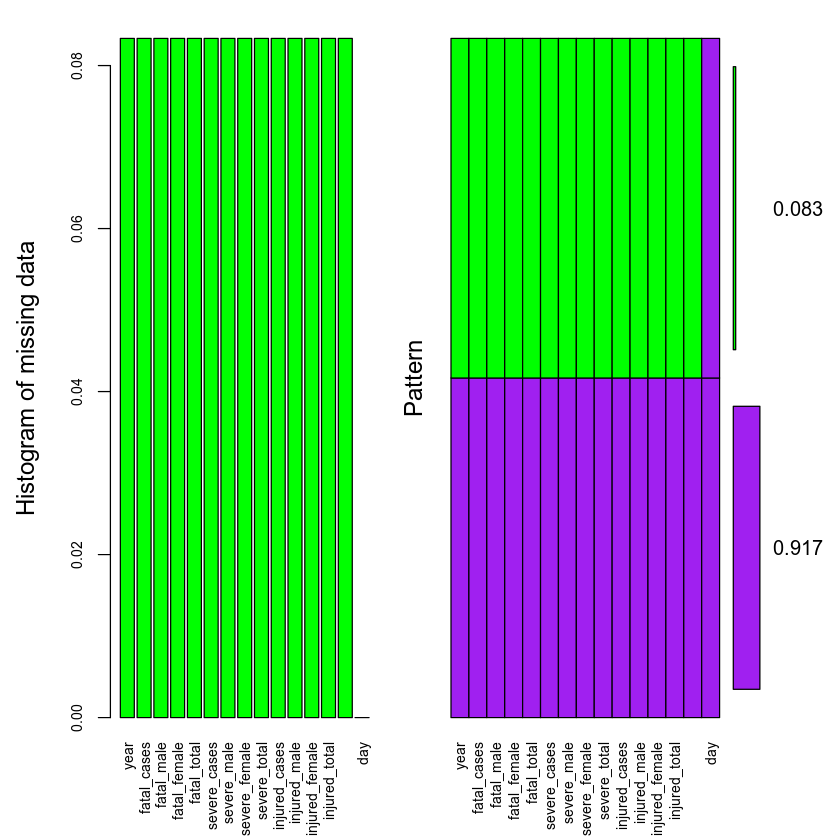

In [10]:
#Read from the dataset
day_data <- read.csv("data/daywise_accidents.csv")

#Plot missing data pattern
library(VIM)
aggr_plot <- aggr(day_data, col=c('purple','green'), numbers=TRUE, sortVars=TRUE, 
                  labels=names(day_data), cex.axis=.7, gap=3, ylab=c("Histogram of missing data","Pattern"))

#### Step2 : Cleaning the data:
This step involves imputing or removing the NA values/rows.
It also converts the variables from R's default data type (factor) when the dataset is imported to the desired type, here to integer except for the days variable.
The values in the days variable is converted to uppercase to maintain uniformity.

In [11]:
#Remove the empty rows
day_data <- na.omit(day_data)

convertColsToInt <- function(df)
{
  for(i in 1:ncol(df))
  {
    if(i == 2)
    {
      df[,i] <- as.factor(toupper(as.character(df[,i]))) 
    }
    else
    {
      df[,i] <- as.vector(df[,i])
    }
  }
  return(df)
}

day_data <- convertColsToInt(day_data)

#### Step3: Understanding the summary statistics of the data:
The basic statistical summary of the dataset is displayed in data frame format for the ease of understanding the dataset in detail. 

In [12]:
#Display customized summary statistics of the dataset
library(fBasics)
basicStats(day_data[,-2])[c("Mean", "Variance", "Stdev","Median", "Minimum",
                            "Maximum", "NAs", "Skewness"),]

Loading required package: timeDate
Loading required package: timeSeries


,year,fatal_cases,fatal_male,fatal_female,fatal_total,severe_cases,severe_male,severe_female,severe_total,injured_cases,injured_male,injured_female,injured_total,noninjured_cases
Mean,1990.500000,72.948052,64.850649,11.694805,76.545455,161.006494,143.337662,29.889610,173.227273,441.909091,487.396104,105.980519,593.376623,276.636364
Variance,40.513072,397.918852,306.598464,22.174221,434.171123,5732.568585,4152.133605,426.321068,7037.523173,6665.168152,8277.404168,966.241448,13257.242849,7326.690434
Stdev,6.364988,19.947903,17.509953,4.708951,20.836773,75.713728,64.437051,20.647544,83.889947,81.640481,90.980241,31.084425,115.140101,85.596089
Median,1990.500000,72.500000,63.500000,11.000000,76.500000,173.000000,149.000000,25.000000,180.000000,453.000000,502.000000,108.000000,616.000000,282.000000
Minimum,1980.000000,35.000000,27.000000,4.000000,40.000000,37.000000,34.000000,2.000000,39.000000,258.000000,207.000000,32.000000,279.000000,128.000000
Maximum,2001.000000,117.000000,101.000000,26.000000,120.000000,300.000000,258.000000,74.000000,331.000000,602.000000,666.000000,176.000000,821.000000,448.000000
NAs,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Skewness,0.000000,0.080473,0.008456,0.377459,0.118769,-0.096288,-0.073573,0.255001,-0.008515,-0.236875,-0.449636,-0.216184,-0.406625,0.203221


#### Step4: Plotting boxplots to identify outliers:

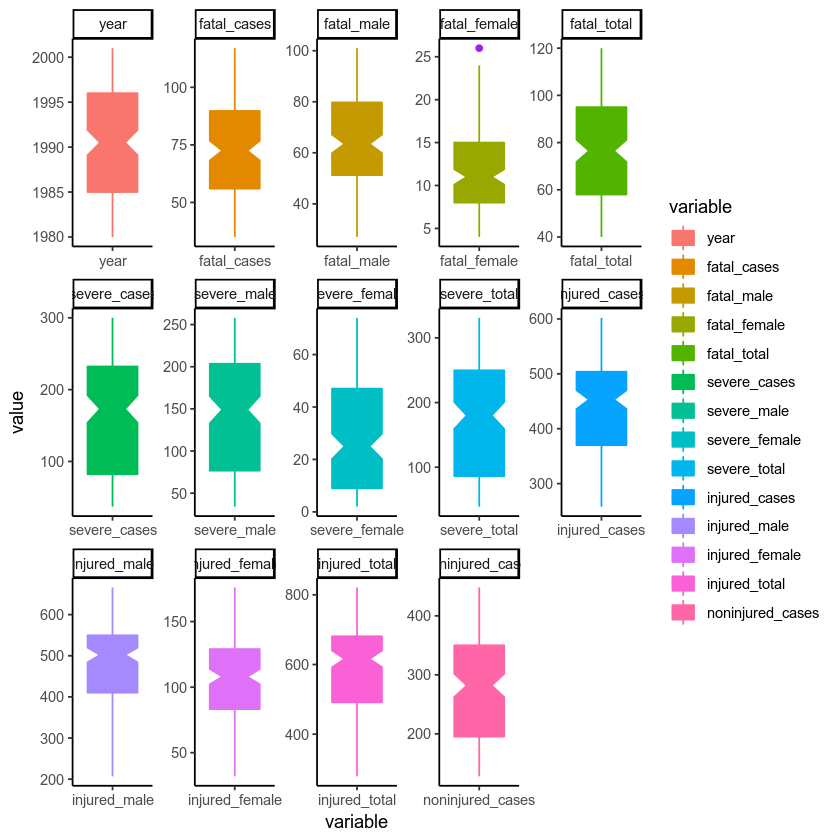

In [13]:
library(reshape2)
library(ggplot2)
day_data_melt <- melt(data = day_data, id.vars = "day")
ggplot(day_data_melt, aes(x = variable, y = value, color = variable, fill = variable)) + 
geom_boxplot(notch = TRUE, varwidth = TRUE, outlier.fill = "purple", outlier.colour = "purple", 
             outlier.alpha = 1) + theme_classic() + facet_wrap(~variable, nrow = 3, ncol = 5, scales = "free")
    


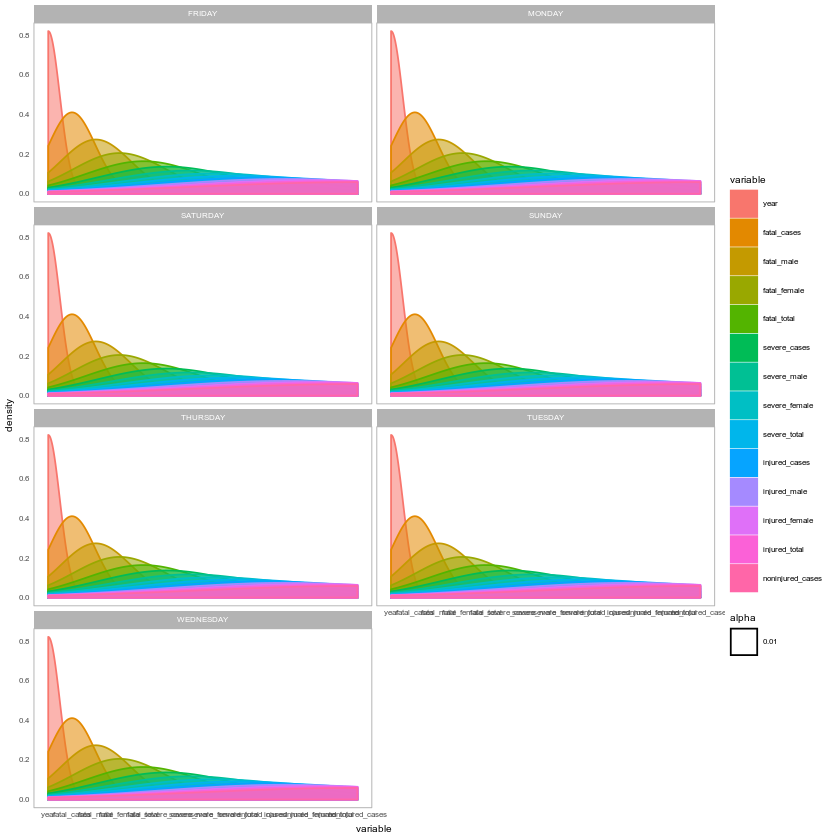

In [15]:
#Density plot 
#Days
ggplot(day_data_melt) + geom_density(aes(x = variable, color = variable, fill = variable, alpha = 0.01)) + 
facet_wrap(~day, nrow = 4, ncol = 2) + theme_light(base_line_size = 0, base_size = 6)

Warning message:
“attributes are not identical across measure variables; they will be dropped”

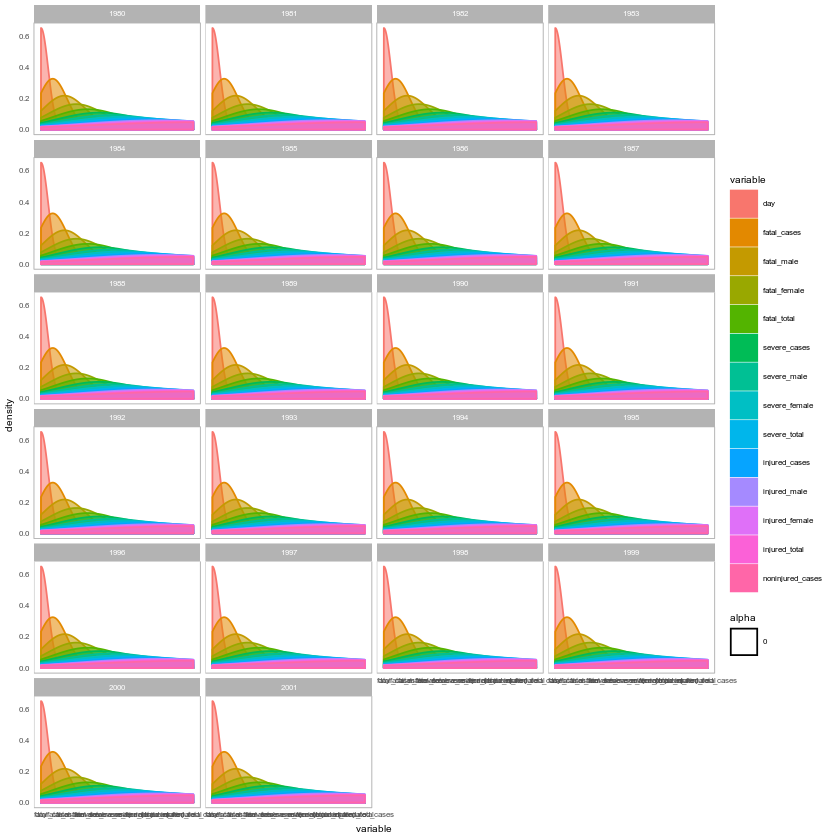

In [16]:
#Years
year_data_melt <- melt(data = day_data, id.vars = "year")
ggplot(year_data_melt) + geom_density(aes(x = variable, color = variable, fill = variable, alpha = 0.0)) + 
facet_wrap(~year, nrow = 6, ncol = 4) + theme_light(base_line_size = 0, base_size = 6)

In [17]:
#Trellis plots
p1 <- qplot(year, fatal_total, data = day_data, color = day, facets = ~day, xlab = "Year", ylab = "Fatalities per day")  
p2 <- qplot(year, severe_total, data = day_data, color = day, facets = ~day, xlab = "Year", ylab = "Severities per day")  
p3 <- qplot(year, injured_total, data = day_data, color = day, facets = ~day, xlab = "Year", ylab = "Injuries per day")
p4 <- qplot(year, noninjured_cases, data = day_data, color = day, facets = ~day, xlab = "Year", ylab = "Non-injuries per day") 
p5 <- qplot(year, fatal_male, data = day_data, color = day, facets = ~day, xlab = "Year", ylab = "Male Fatalities per day")  
p6 <- qplot(year, fatal_female, data = day_data, color = day, facets = ~day, xlab = "Year", ylab = "Female Fatalities per day")  
p7 <- qplot(year, severe_male, data = day_data, color = day, facets = ~day, xlab = "Year", ylab = "Male Severities per day") 
p8 <- qplot(year, severe_female, data = day_data, color = day, facets = ~day, xlab = "Year", ylab = "Female Severities per day") 
p9 <- qplot(year, injured_male, data = day_data, color = day, facets = ~day, xlab = "Year", ylab = "Male Injuries per day")
p10 <- qplot(year, injured_female, data = day_data, color = day, facets = ~day, xlab = "Year", ylab = "Female Injuries per day")

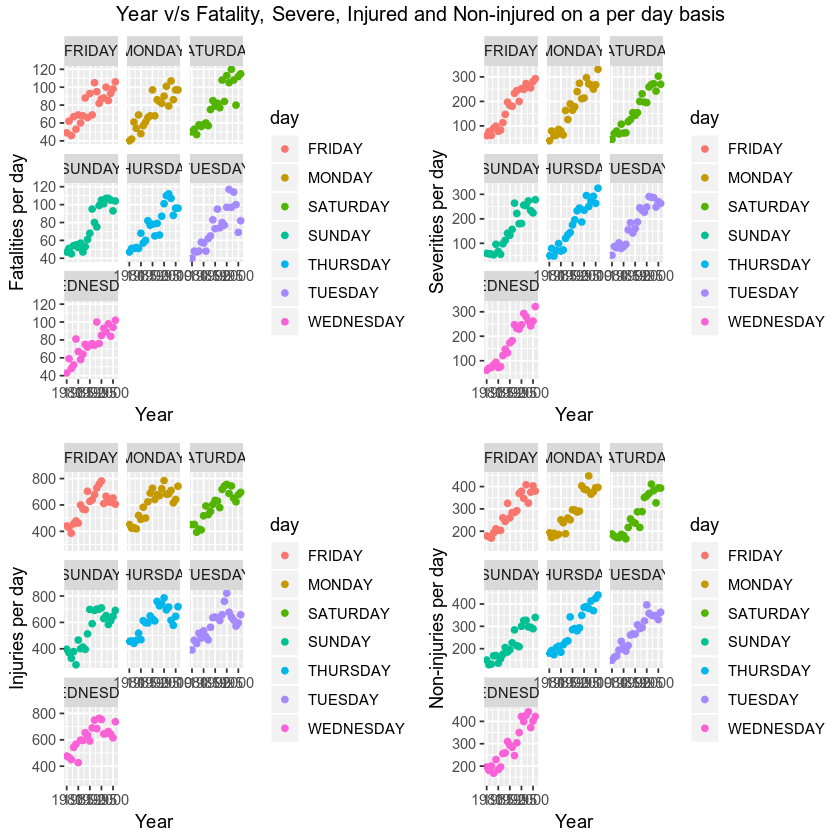

In [18]:
library(gridExtra)
grid.arrange(p1, p2, p3, p4, top = "Year v/s Fatality, Severe, Injured and Non-injured on a per day basis")

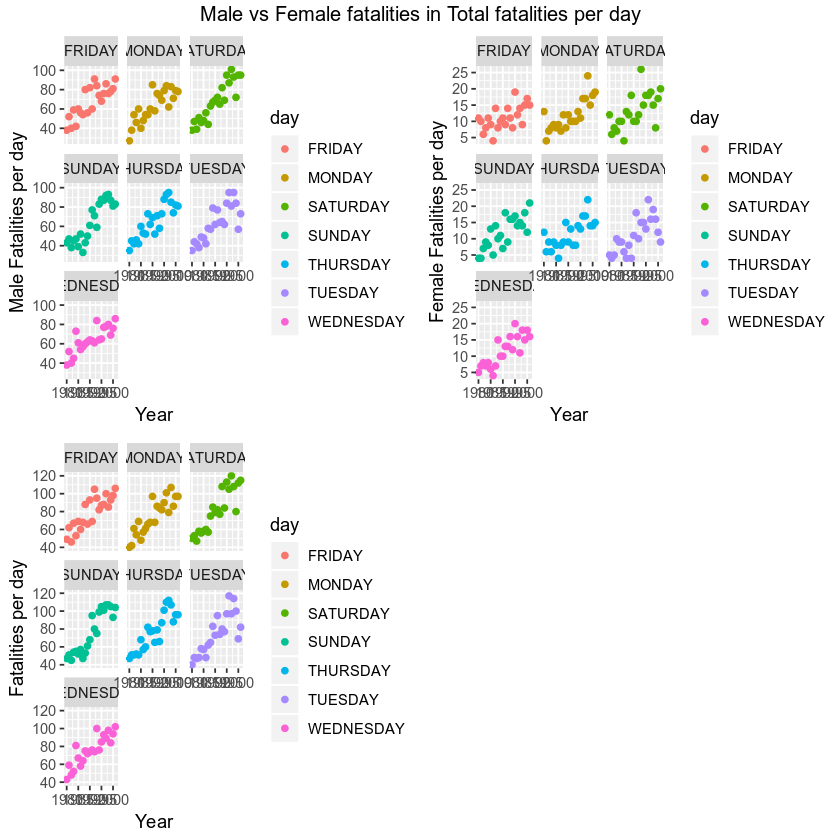

In [19]:
grid.arrange(p5, p6, nrow = 2, p1, top = "Male vs Female fatalities in Total fatalities per day")

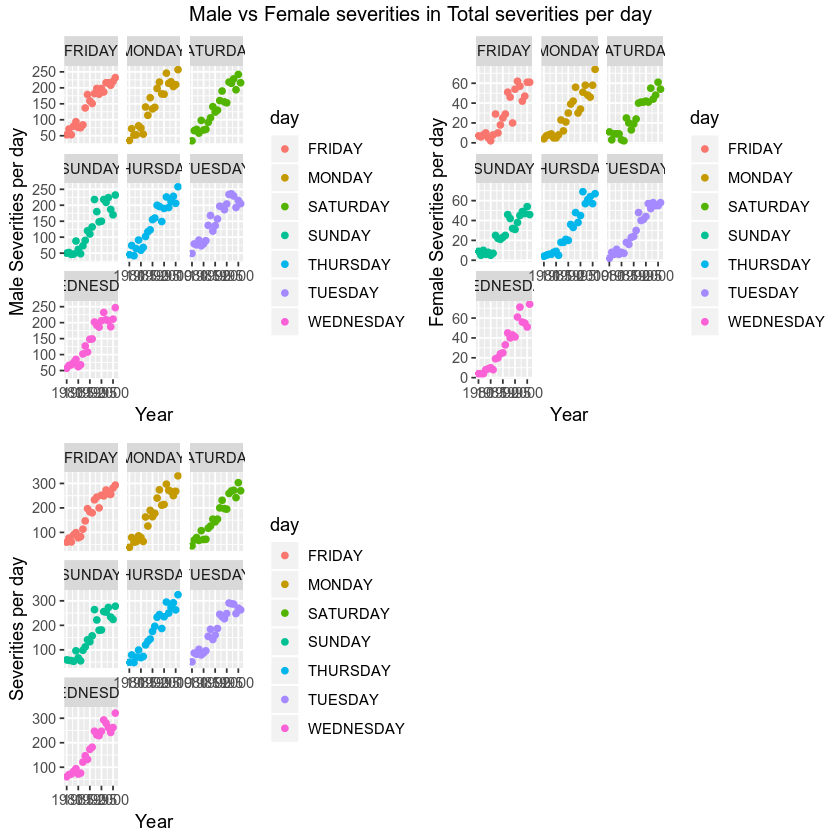

In [20]:
grid.arrange(p7, p8, nrow = 2, p2, top = "Male vs Female severities in Total severities per day")

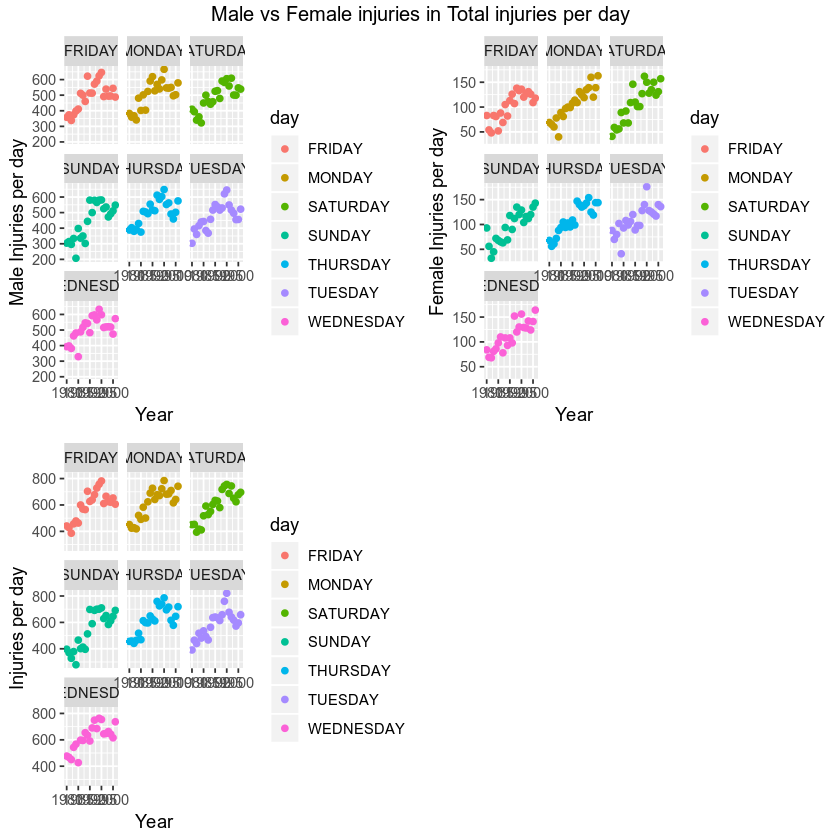

In [21]:
grid.arrange(p9, p10, nrow = 2, p3, top = "Male vs Female injuries in Total injuries per day")